### Automate Emotion Analysis Of Texual Comments And Feedback NLP Project
+ Emotion Detection In Text
+ Text Classifier

In [ ]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [ ]:
# Load Data Viz Pkgs
import seaborn as sns
#import matplotlib as plt
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 1.4 MB/s eta 0:00:00


In [ ]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [ ]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
# Load Dataset
df = pd.read_csv("emotion_dataset_2.csv")

In [ ]:
df.head()

Unnamed: 0  Emotion                                               Text  \
0           0  neutral                                             Why ?    
1           1      joy    Sage Act upgrade on my to do list for tommorow.   
2           2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3           3      joy   Such an eye ! The true hazel eye-and so brill...   
4           4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   

                                          Clean_Text  
0                                                NaN  
1                     Sage Act upgrade list tommorow  
2  WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3  eye  true hazel eyeand brilliant  Regular feat...  
4    ugh babe hugggzzz u  babe naamazed nga ako e...

In [ ]:
# Value Counts
df['Emotion'].value_counts()

joy         8761
sadness     5278
fear        4267
anger       3398
surprise    3211
neutral     1787
disgust      693
shame        125
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

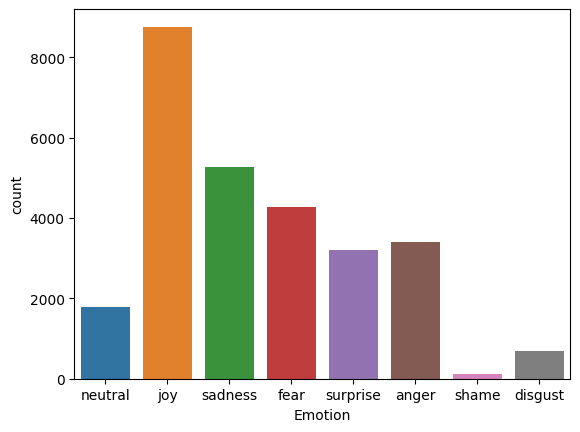

In [ ]:
# Plot
sns.countplot(x='Emotion',data=df)

In [ ]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [ ]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
#punctuations
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [ ]:
#special Charcters
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)

In [ ]:
df

Unnamed: 0   Emotion  \
0               0   neutral   
1               1       joy   
2               2   sadness   
3               3       joy   
4               4       joy   
...           ...       ...   
27515       27515   sadness   
27516       27516   disgust   
27517       27517   neutral   
27518       27518  surprise   
27519       27519       joy   

                                                    Text  \
0                                                 Why ?    
1        Sage Act upgrade on my to do list for tommorow.   
2      ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3       Such an eye ! The true hazel eye-and so brill...   
4      @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
...                                                  ...   
27515  Domani vado allo stadio a vedere il  .. L'  qu...   
27516  Me: &quot;A new accuser popped up today.&quot;...   
27517   Aha ! Now I understand.You were trying to buy...   
27518  mom got me organic, gluten-free, vegan chips a...   
27519  Oh it's going to be one of those days again. J...   

                                              Clean_Text  
0                                                         
1                         Sage Act upgrade list tommorow  
2      WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...  
3      eye  true hazel eyeand brilliant  Regular feat...  
4      ugh babe hugggzzz u  babe naamazed nga ako e b...  
...                                                  ...  
27515  Domani vado allo stadio vedere il  L questanno...  
27516  Me quotA new accuser popped todayquot quotFor ...  
27517  Aha  understandYou trying buy stolen goods sid...  
27518  mom got organic glutenfree vegan chips theyre ...  
27519  Oh going days again like single day ridiculous...  

[27520 rows x 4 columns]

In [ ]:
#Keyword Extraction
###Extract most commonest words per class of emotion


In [ ]:
from collections import Counter

In [ ]:
def extract_keywords(text,num=50):
  tokens=[ token for token in text.split()]
  most_common_tokens=Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [ ]:
#list of emotions
emotion_list=df['Emotion'].unique().tolist()

In [ ]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [ ]:
joy_list=df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [ ]:
#joy Document
joy_docx=' '.join(joy_list)

In [ ]:
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy  hopes prayers beloved son come fruition  feeling fail french fuckfrench GoodLet   fell love X Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah   ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome  brings  Ive bought Christmas presents trawl loads shops  shit pants Pure 100 gravy life  Leopold truly happy  hopes prayers beloved son come fruition  Class jamming paper quarter 

In [ ]:
#extract Keywords
keyword_joy=extract_keywords(joy_docx)

In [ ]:
keyword_joy

{'day': 585,
 'amp': 551,
 'time': 490,
 'Im': 452,
 'work': 410,
 'today': 379,
 'like': 363,
 'Christmas': 358,
 'tomorrow': 357,
 'love': 353,
 'happy': 306,
 'good': 282,
 'night': 278,
 'school': 242,
 'going': 241,
 'got': 238,
 'home': 236,
 'joy': 235,
 'morning': 235,
 '2': 221,
 'life': 209,
 'hours': 206,
 'week': 197,
 'feel': 183,
 'year': 177,
 'great': 169,
 'me': 167,
 'people': 165,
 'days': 163,
 'family': 163,
 'tonight': 159,
 'God': 150,
 'new': 150,
 'long': 150,
 'sleep': 149,
 's': 146,
 'hour': 136,
 'cant': 134,
 'friends': 131,
 'friend': 129,
 'RT': 128,
 'it': 127,
 'know': 127,
 'felt': 126,
 'christmas': 121,
 'feeling': 117,
 'think': 115,
 'weekend': 114,
 '3': 112,
 'u': 111}

In [ ]:
#word Cloud
from wordcloud import WordCloud


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_wordcloud(docx):
  mywordcloud=WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show

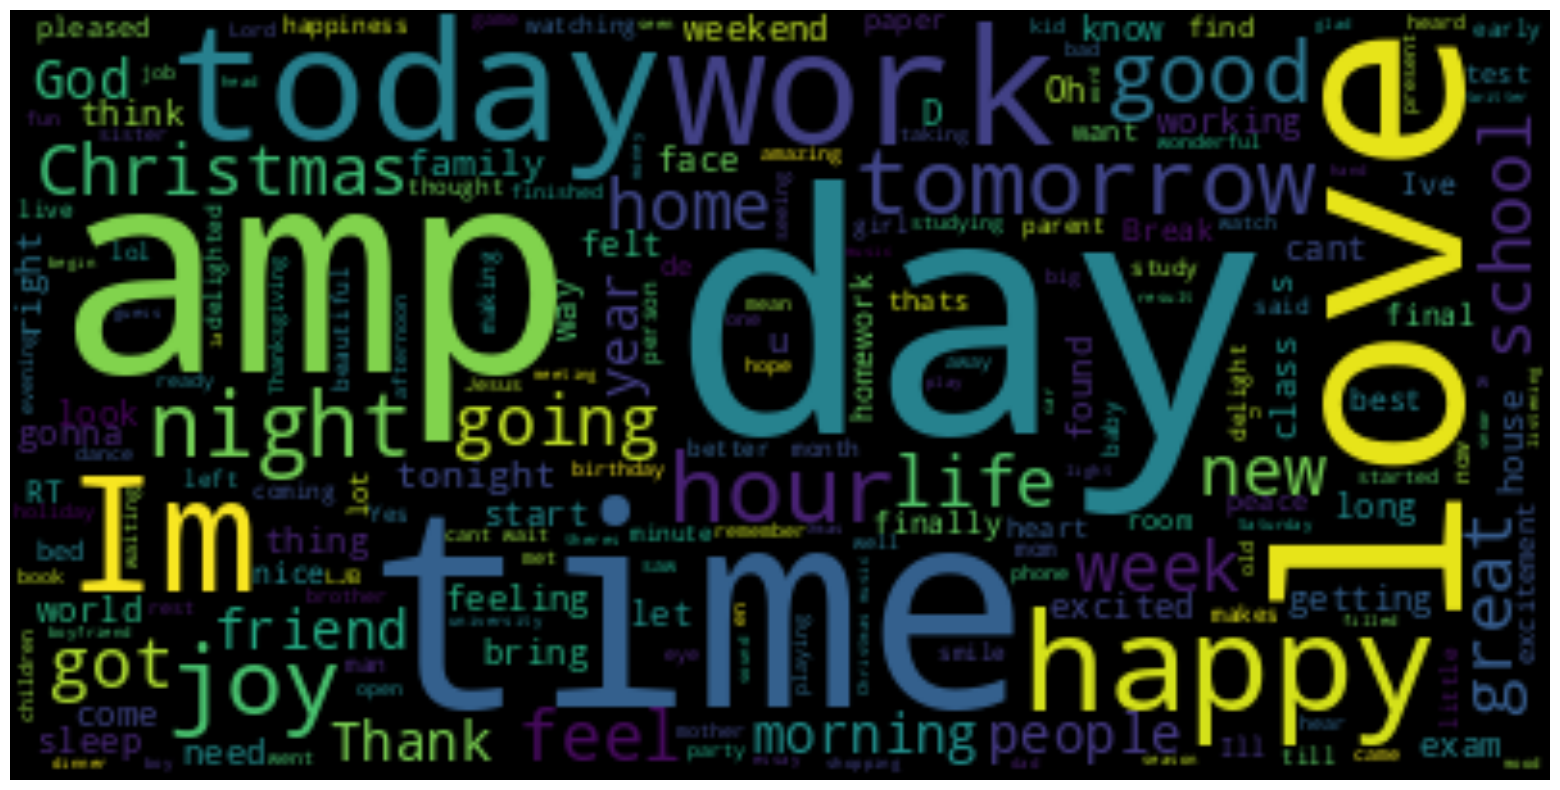

In [ ]:
plot_wordcloud(joy_docx)

In [ ]:
#sadness docx
sadness_list=df[df['Emotion'] == 'sadness']['Clean_Text'].tolist()
sad_docx=' '.join(sadness_list)
sad_docx



'WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SHOWS BLESSED Couldnt wait live missing NH7 wasnt painful enuf Suraj s performing gig delhi People hide fake smile Shakuhachi dress 580 1022 mm lens 708 pain  Oh  thats bad  doctor  welcome glad night love you leave  im gonna miss much losing something Going fat burger dinner dad homies ride ponies look like sad puppy wanttoride ankleneedstoheal OMG December 5th windows open house Mr Winter you Jack frost missing too thought agreed   going weeks rework  Bro team lost  played swag freshcut moment terror drink hot chocolate knowing burn mouth  lot pressure  boss pushy  assigned projects  deadlines near  finished projects  Sink broken 2night going lambnow pbj apparently lost bestfriend rarely desperate need talk to Tonight nights sleeping Im loss Sr HS class counselors died hepatitis sensitive knew shyness drew improve image missed funeral  publically grieve parents understand NOOOOOO pongan super torpe las 9 de la maana entendemos que nadie lo

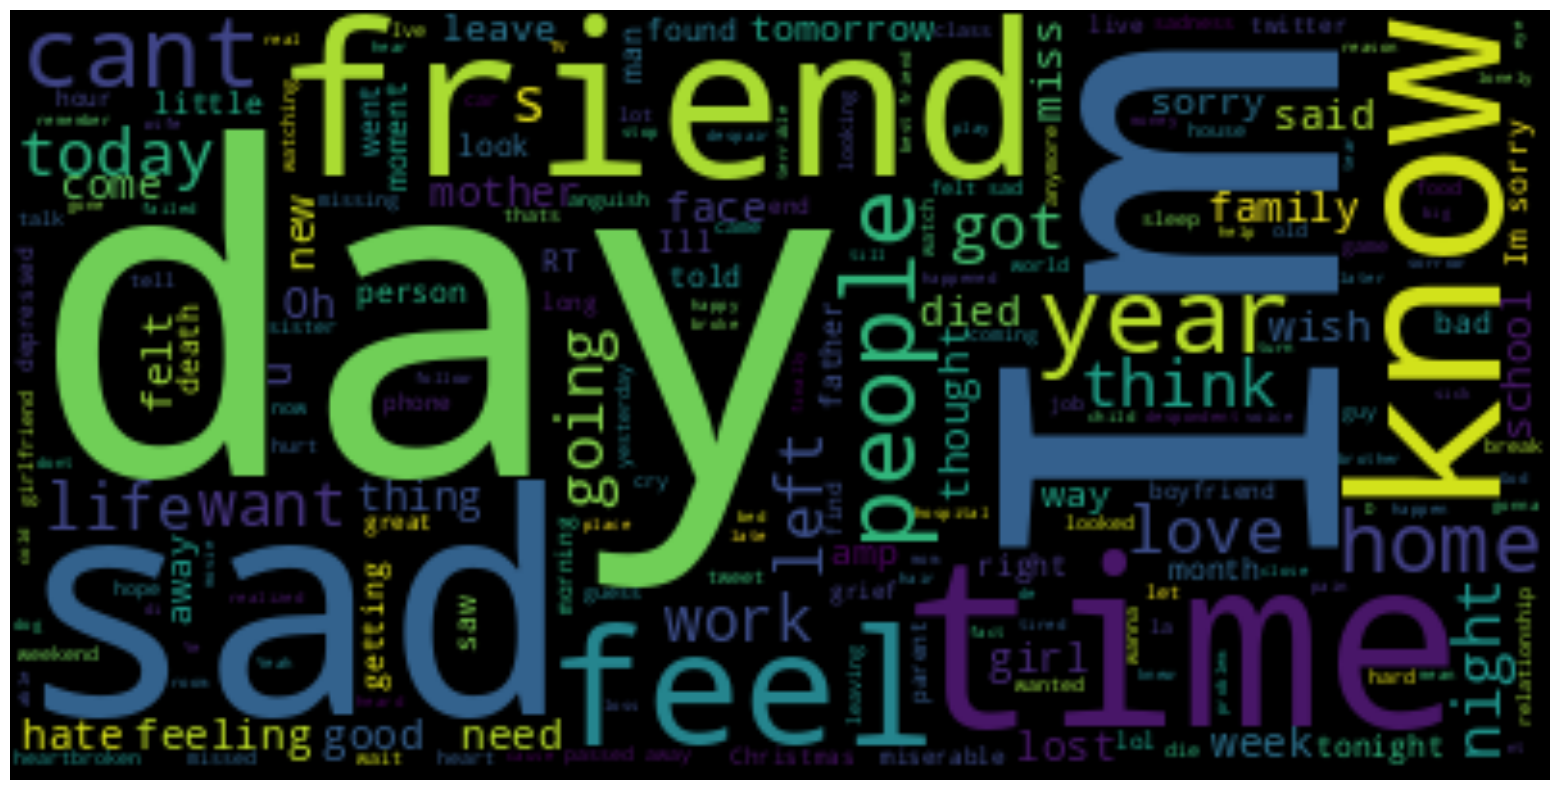

In [ ]:
plot_wordcloud(sad_docx)

In [ ]:
#fear docx
fear_list=df[df['Emotion'] == 'fear']['Clean_Text'].tolist()
fear_docx=' '.join(fear_list)
fear_docx

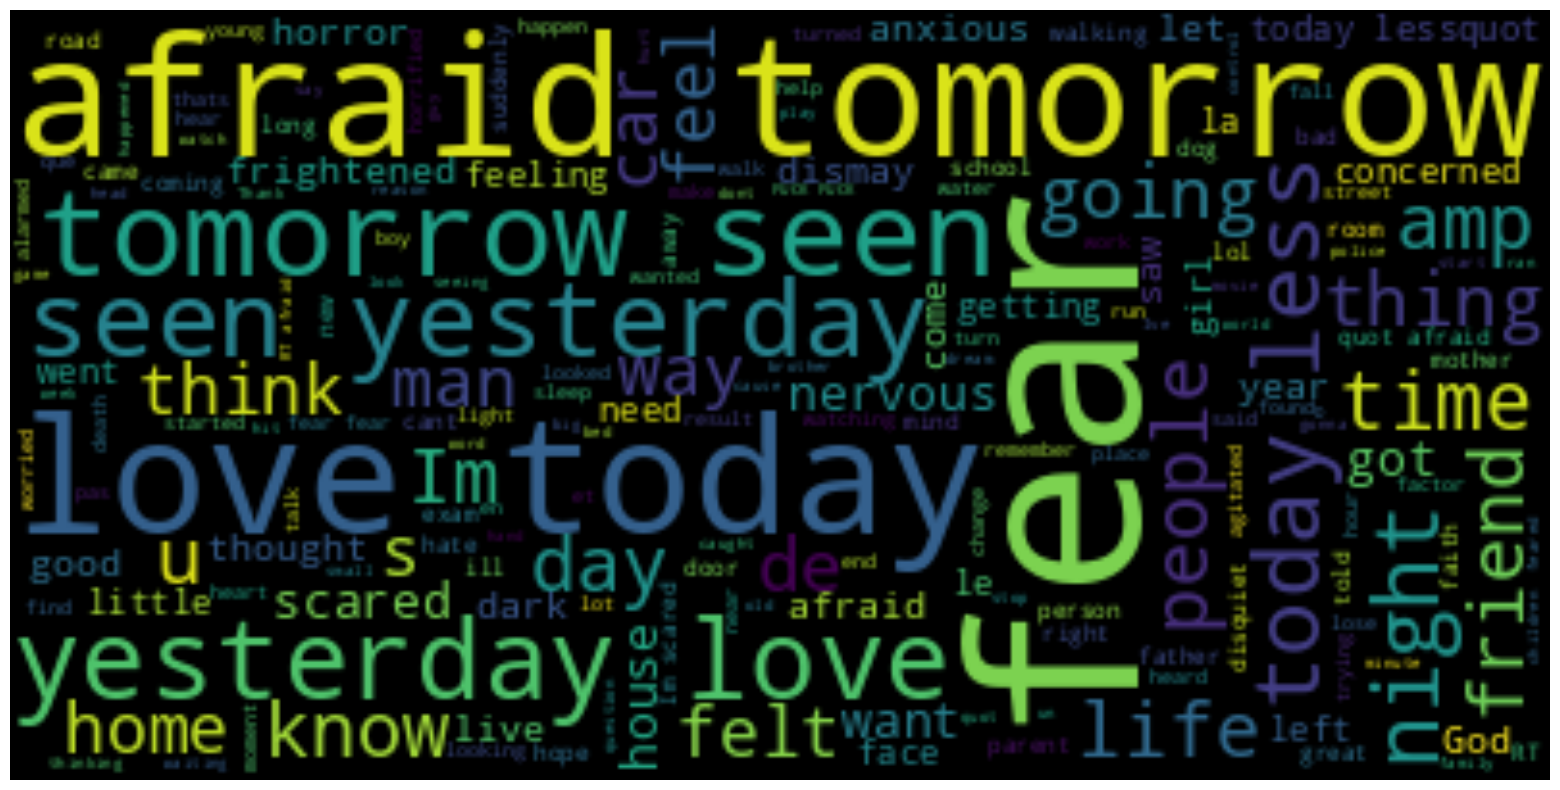

In [ ]:
plot_wordcloud(fear_docx)

In [ ]:
#surprise docx

sur_list=df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
surprise_docx=' '.join(sur_list)
surprise_docx

'maken Tip 2 Stop op een moment dat je het hele project wel ziet zitten Nu dus derestkomtlaterwel En dan krijg je ff een cadeautje van een tweep melike Drummer Boy bij op verzoek van   welke uitvoering van wie Haha course come home different house leave parents redo entire downstairs warning reeeeeellllyyyyyyy need tell something guess what phone fucked up gotohellmexicanphone ending pooped pants end weeks crazy ending dEcodEd pop amp roll floor  alleen nog morgen cadootjes kopen stadje en dan helemaal klaar Im planet Im planets hold life amp discovered Good Morning Store Today EnjoyTheDay forgot hair red looked mirror Stopped today gas small town attendant came tell quotwe service young tweeters clue Cant wait open christmas prezzie christmas Decorating entire house christmas cheer mommy Iemand nog surprise idee voor een vrouw trouble comes realise gone watching reruns living one oh thought Id stop SPEND CHRISTMAS HOLIDAYS LAKE Miss you chocomousse vergt 175 ml slagroom dat heb ik dus

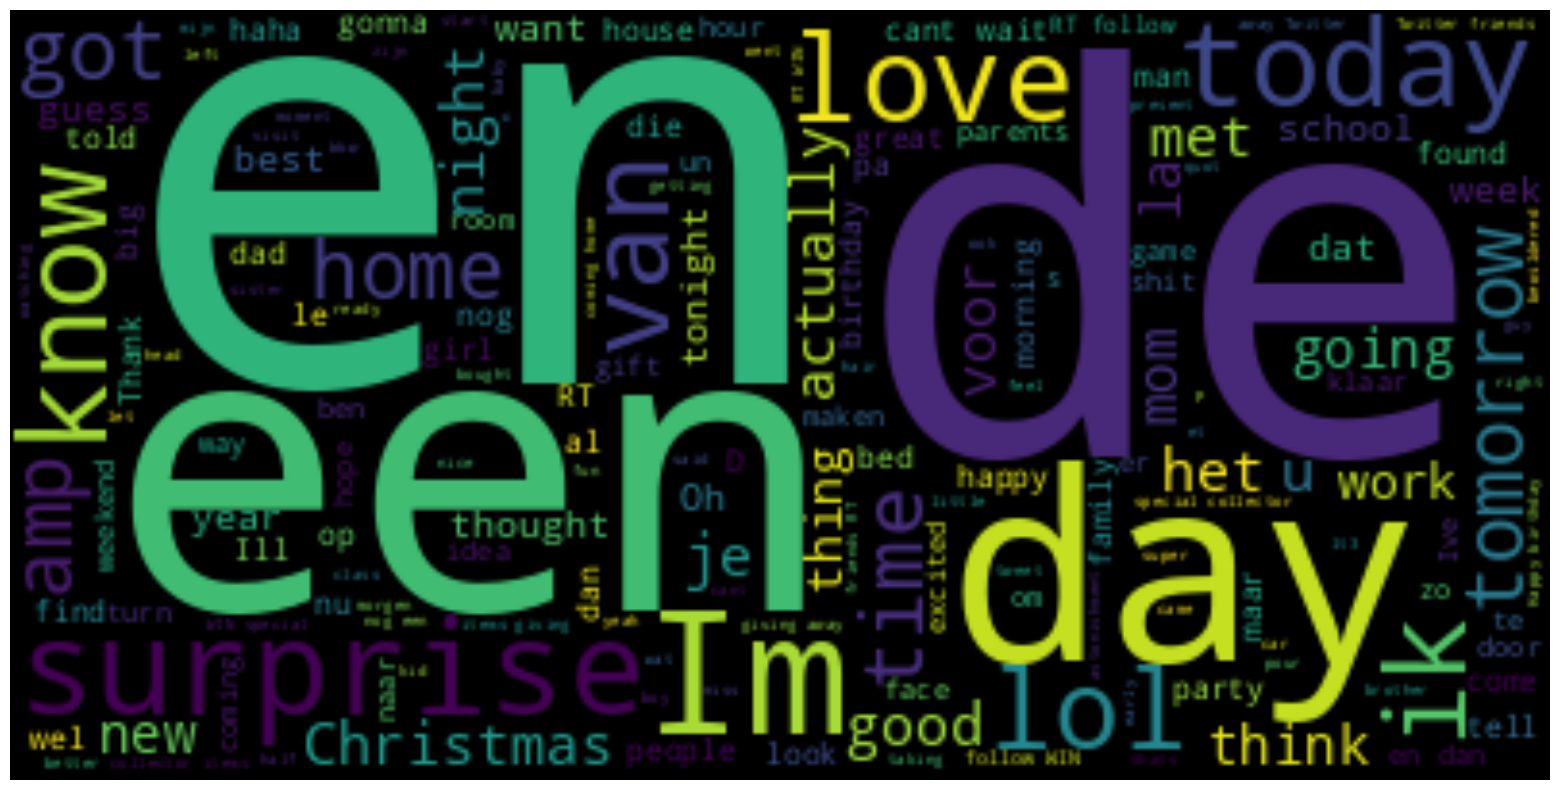

In [ ]:
plot_wordcloud(surprise_docx)

In [ ]:
#anger docx

anger_list=df[df['Emotion'] == 'anger']['Clean_Text'].tolist()
anger_docx=' '.join(anger_list)
anger_docx

'bull tossed effigy hands infuriated    everybody   talk  kill work number slakers wandering around nothing parents allow social function friends attending tried rape best friends claimed fault hassled her claimed loose threatened sue her effect smoking reefer juvenile emotion simple minded creature express Suppressing annoyance called  Little Sara   replied  Sly left feeling absolutely livid  left student newspaper Chinese university table library disappeared came back dipped cotton wool water dabbed livid puffy eyes  soud like neighbours hell  teachers suspicious popularity  annoyed lack interest academic work infuriated achieve high marks examinations  broke artistic work weeks Changes broken permission right this impossible  cheated  disappointed actually consider Taylor Swift role Eponine movie version Les Mis informed flatmate that wed moved flat shed expected buy food separetely  event actually happened 5 months sharing began Prior this said nothing impression arouse anger see a

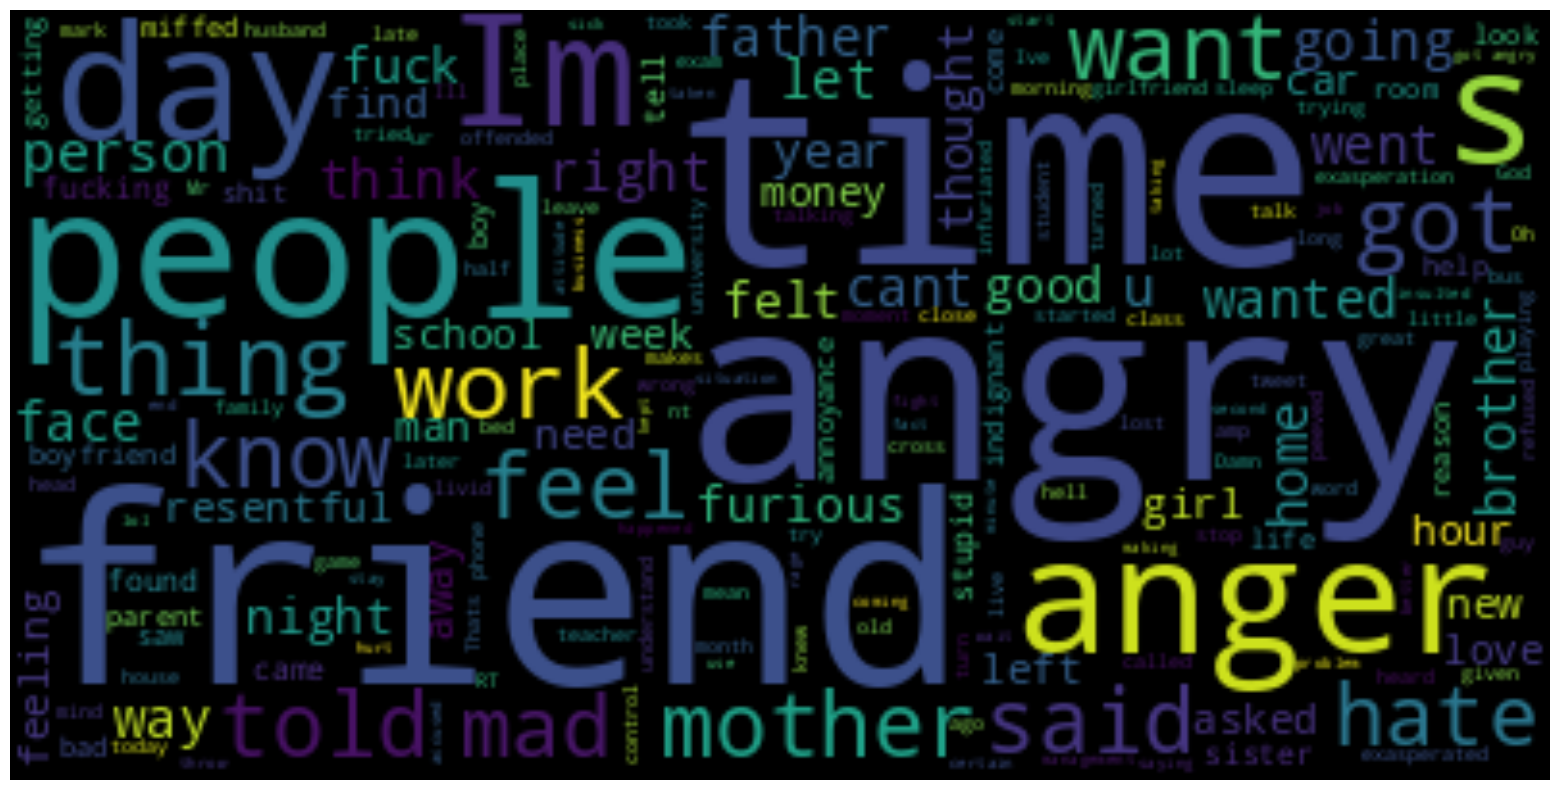

In [ ]:
plot_wordcloud(anger_docx)

In [ ]:
#shame docx

shame_list=df[df['Emotion'] == 'shame']['Clean_Text'].tolist()
shame_docx=' '.join(shame_list)
shame_docx

'doubted  failed recognise temporary financial embarrassment   s  playing infant games   demanded  gratified flush embarrassment Tristram s cheek  remember extremely ashamed racist chants Leeds fans coming night  Jasper reddened pressed lip  Farraline looked embarrassed  getting increasingly embarrassed Mattie sat waiting ONeill  mortified  nt appear presentation ceremony nt receive medal memento occasion  men  women  embarrassed noises dissent  Americans ashamed kind attitude  ashamed feeling sorry transfer pity  irresistible hesitated  embarrassed taken long  gazed embarrassed  young farm worker enjoys leg pulled taunts  yokel   country bumpkin pubs discothques eventually ashamed admitting occupation  old people little embarrassment bodily functions  husbands wives stuff takenforgranted childhood  decided drop note Carla s letterbox cope embarrassment phone  m ashamed suspected   nt home business associates dinner embarrassed   sense  course  including biblical   added penetrating wh

In [ ]:
plot_wordcloud(shame_docx)

In [ ]:
#disgust docx

dis_list=df[df['Emotion'] == 'disgust']['Clean_Text'].tolist()
disgust_docx=' '.join(shame_list)
disgust_docx

'doubted  failed recognise temporary financial embarrassment   s  playing infant games   demanded  gratified flush embarrassment Tristram s cheek  remember extremely ashamed racist chants Leeds fans coming night  Jasper reddened pressed lip  Farraline looked embarrassed  getting increasingly embarrassed Mattie sat waiting ONeill  mortified  nt appear presentation ceremony nt receive medal memento occasion  men  women  embarrassed noises dissent  Americans ashamed kind attitude  ashamed feeling sorry transfer pity  irresistible hesitated  embarrassed taken long  gazed embarrassed  young farm worker enjoys leg pulled taunts  yokel   country bumpkin pubs discothques eventually ashamed admitting occupation  old people little embarrassment bodily functions  husbands wives stuff takenforgranted childhood  decided drop note Carla s letterbox cope embarrassment phone  m ashamed suspected   nt home business associates dinner embarrassed   sense  course  including biblical   added penetrating wh

In [ ]:
plot_wordcloud(disgust_docx)

In [ ]:
#neutral docx

neutral_list=df[df['Emotion'] == 'neutral']['Clean_Text'].tolist()
neutral_docx=' '.join(neutral_list)
neutral_docx

' motherinlaw thing  disciplining  disciplining  complained food fed  schools sent  sun   think  started talking  found extremely funny witty  stop laughing jokes  common  like team  music  amazingly  love Chinese food  feeling going great friends     better prepare examination   beach school  Yes  good informative  think people underestimate value TV education     look good  irritable  understand program  thats     damage  OK  guy  want improve handwriting  Ive practiced weeks  happened   handwriting bad  Certainly  OK  Bye   bet  company decided cancel trip Hong Kong   wish store close open 24  house day  enjoy making movie  heard stories disagreement actors director     sure  ask directions coffee shop  like return book   42   plot new movie  Oh  yes shoot pool  Yes   magazine arrives post beginning month  buy magazines  Bye  Yes  going university courses  Oh   Im  sounds good  Lets   sorry   know  crossing road pay attention whats   Hi  Walter    find table Ill drinks  Possibly  Br

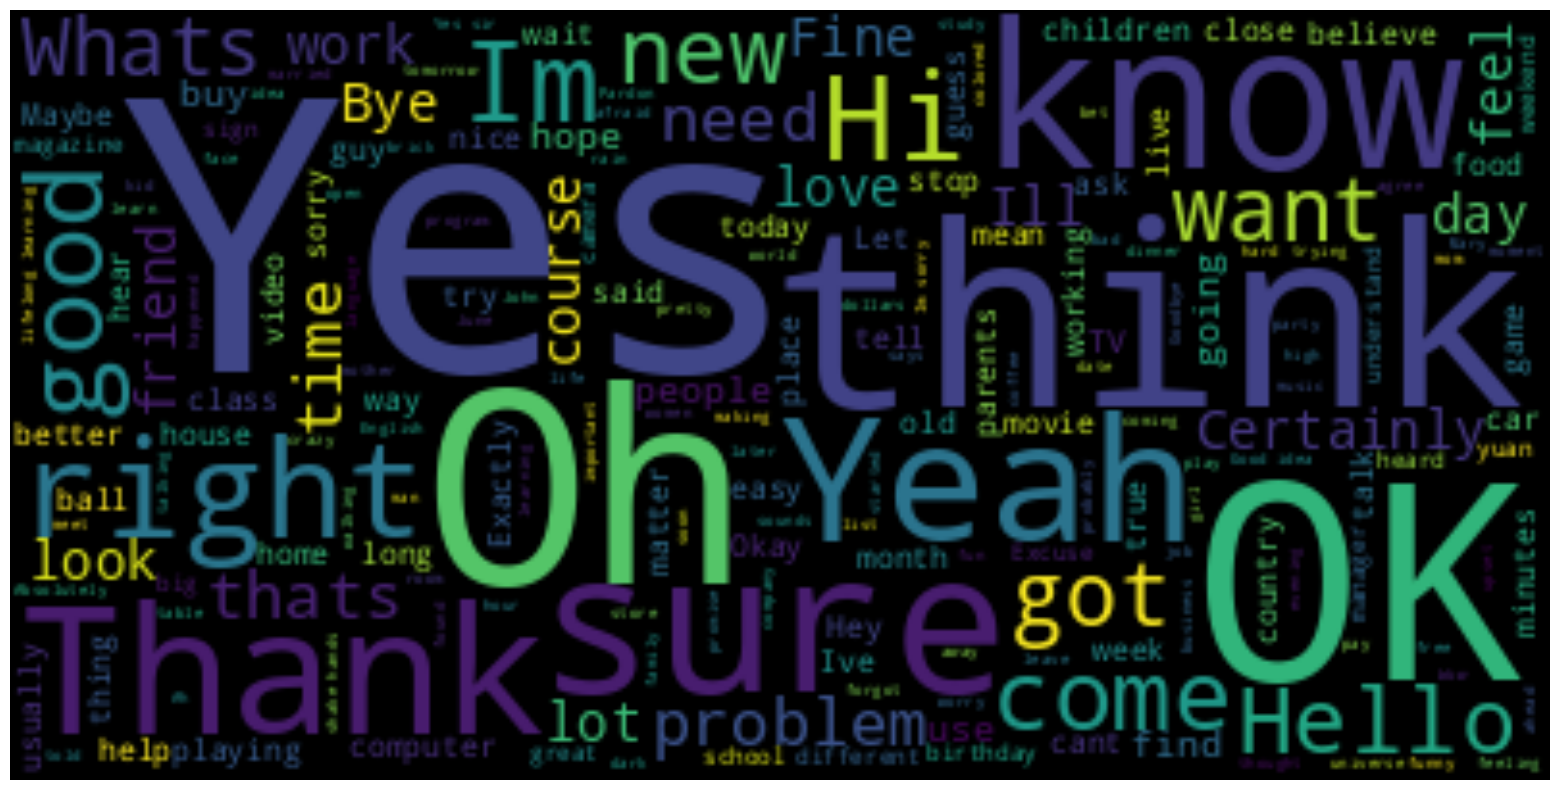

In [ ]:
plot_wordcloud(neutral_docx)

In [ ]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [ ]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [ ]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [ ]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.5987086359967716

In [ ]:
# Make A Prediction
ex1 = "side effects of this cream are harmfull"

In [ ]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [ ]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[3.24465583e-05, 2.46477000e-03, 9.88637694e-01, 7.52759559e-04,
        9.75181255e-08, 7.82903651e-03, 8.20973478e-06, 2.74986347e-04]])

In [ ]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)